# 안녕하세요:)

## '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [1]:
import pandas as pd

In [2]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [3]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [4]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [5]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
#df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [8]:
df = pd.merge(standard,df_seoul_people,how='inner', on='자치구')
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')
df = pd.merge(df,df_seoul_bus_station,how='inner', on='자치구')
#df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [9]:
df.to_csv("last_df.csv", index = False)

In [10]:
df.isnull().sum()

도착 시군구 코드      0
자치구            0
인구 합계          0
65세이상고령자       0
택시운송업 사업체 수    0
택시운송업 종사자 수    0
정류장수           0
노선수            0
승차총승객수         0
하차총승객수         0
승차평균승객수        0
하차평균승객수        0
승하차총승객수        0
dtype: int64

---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1

승하차 총승객수가 많은 곳에 버스 노선수가 더 필요하다

* 가설 2

* 가설 3

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [11]:
from scipy.stats import kruskal
import scipy.stats as stats
import scipy.stats
from scipy.stats import probplot
import scipy.stats as spst
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [12]:
#df.drop(columns=df.columns[[]], inplace=True)

In [13]:
df.shape

(25, 13)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


# 정규성 검정

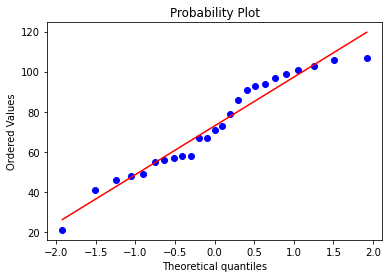

In [14]:
plt.figure()
probplot(df['노선수'], plot=plt)
plt.show()

QQ plot 그래프

In [15]:
test_stat, p_val = stats.shapiro(df['승하차총승객수'])
print("검정통계치 W : %.5f"%test_stat)
print("p-value : %.45f"%p_val)

검정통계치 W : 0.95583
p-value : 0.337694138288497924804687500000000000000000000


In [16]:
test_stat, p_val = stats.shapiro(df['노선수'])
print("검정통계치 W : %.5f"%test_stat)
print("p-value : %.45f"%p_val)

검정통계치 W : 0.94532
p-value : 0.196290209889411926269531250000000000000000000


shapiro 검증을 통한 정규성 검정

## p-value < 0.5 이므로 정규성 따름

# 노선수에 따른 승하차 총 승객수 그래프

In [17]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

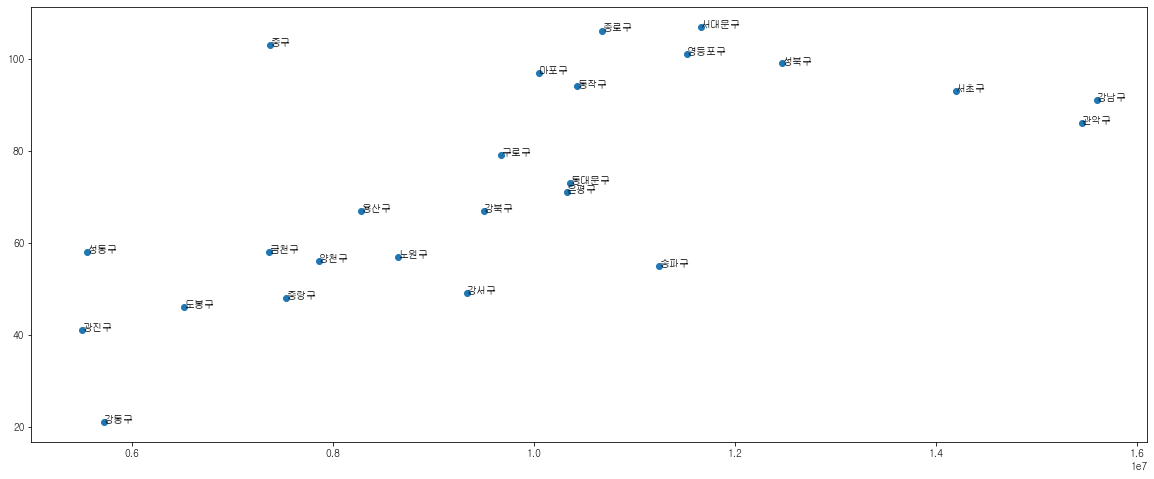

In [18]:
fig=plt.figure(figsize=(20,8))
plt.scatter(df['승하차총승객수'],df['노선수'])

for i in range(len(df)): # 행 개수만큼 순회
    row = df.iloc[i] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['승하차총승객수'] # x좌표가 저장된 열
    y = row['노선수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정

plt.show()

# 피어슨을 이용한 상관계수

In [19]:
spst.pearsonr(df['노선수'],df['승하차총승객수'])

(0.6596714851091889, 0.00033402677594491934)

### 0.65의 양의 상관계수 가짐. p-value가 0.05보다 작으므로 상관계수가 0 이라는 귀무가설 기각

# 회귀분석

In [20]:
from statsmodels.formula.api import ols

In [21]:
res = ols('승하차총승객수 ~ 노선수', data = df).fit()

In [22]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                승하차총승객수   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     17.72
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           0.000334
Time:                        17:39:49   Log-Likelihood:                -399.12
No. Observations:                  25   AIC:                             802.2
Df Residuals:                      23   BIC:                             804.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.016e+06   1.42e+06      2.827      0.010    1.08e+06    6.96e+06
노선수         7.812e+04   1.86e+04      4.210      0.000    3.97e+04    1.17e+05
==============================================================================
Omnibus:                        2.434   Durbin-Watson:                   0.943
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.126
Skew:                           0.449   Prob(JB):                        0.569
Kurtosis:                       3.523   Cond. No.                         251.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 설명력(R-squared)는 0.435로 약 43%를 설명한다.

## Prob(F-statistic) 즉, P-value가 0.05 > 0.000334 이므로 유의미하다. 즉, 서로 상관관계이다.

## P>|t| 가 0.05 보다 작으므로 노선수가 증가할 때 기대되는 승하차 총 승객수의 변화는 유의수준 5%에서 통계적으로 유의미하다.

### Coef는 데이터로부터 얻은 계수의 추정치를 말한다.

### 절편(Intercept)의 추정치는 4.016e+06로, 노선수가 0일 때 승하차 총 승객수의 값이다.

### 노선수의 계수 추정치는 7.812e+04로 노선수가 1 증가할 때마다 승하차 총 승객수가 7.812e+04 증가한다는 것을 의미한다.

## 즉, 수식으로 정리하면, 승하차 총 승객수 = 4.016e+06 +  7.812e+04 * 노선수이다.

C:\Users\swjdg\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\swjdg\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


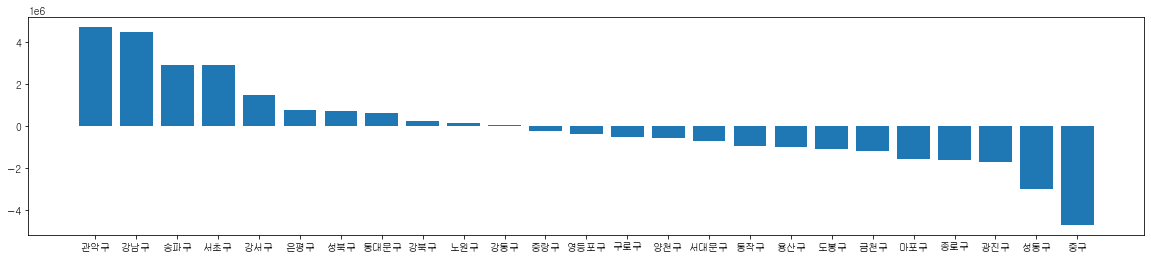

In [23]:
theory = df[['자치구','승하차총승객수','노선수']]
theory['회귀예측 총승객수'] = 4.016e+06 + 7.812e+04 * theory['노선수']
theory['예측차이'] = theory['승하차총승객수'] - theory['회귀예측 총승객수']

plt.figure(figsize=(20,4))
plt.bar('자치구','예측차이',data = theory.sort_values('예측차이',ascending=False))
plt.show()

## 위 그래프를 보면, 0을 기준으로 양수값이면 예측값보다 노선수가 많다는 의미이고, 음수이면 예측값보다 노선수가 적다는 뜻이다.

## 정렬(sort)해서 나타내 보았다.

In [24]:
theory.sort_values(by='예측차이', ascending=False)

,자치구,승하차총승객수,노선수,회귀예측 총승객수,예측차이
20,관악구,15448295,86,10734320.0,4713975.0
22,강남구,15599696,91,11124920.0,4474776.0
23,송파구,11245230,55,8312600.0,2932630.0
21,서초구,14199280,93,11281160.0,2918120.0
15,강서구,9333911,49,7843880.0,1490031.0
11,은평구,10324159,71,9562520.0,761639.0
7,성북구,12467662,99,11749880.0,717782.0
5,동대문구,10355944,73,9718760.0,637184.0
8,강북구,9496964,67,9250040.0,246924.0
10,노원구,8646019,57,8468840.0,177179.0


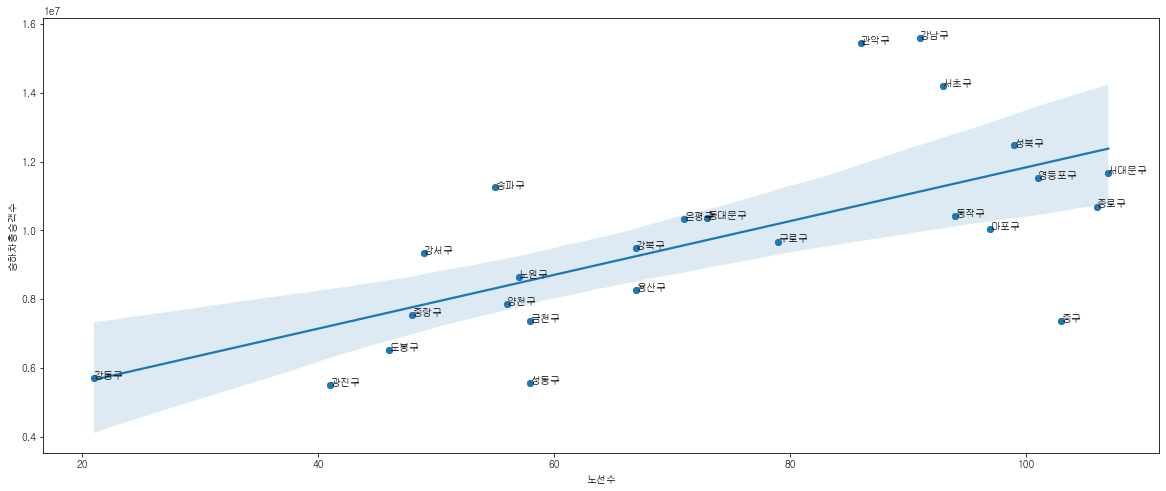

In [25]:
fig=plt.figure(figsize=(20,8))
plt.scatter(df['노선수'],df['승하차총승객수'])
sns.regplot(x='노선수',y='승하차총승객수',data=theory) #예측값

for i in range(len(df)): # 행 개수만큼 순회
    row = df.iloc[i] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['노선수'] # x좌표가 저장된 열
    y = row['승하차총승객수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정

plt.show()

## 파란 영역과 멀리 떨어져 있을수록 노선수가 많거나 적은 것.

# 중구, 성동구가 승하차 총 승객수 대비 노선수가 많이 부족하고, 관악구, 강남구가 승하차 총 승객수 대비 노선수가 많다는 것을 알 수 있다.

# LinearRegression 활용한 선형 회귀 모델 구현

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
line_fitter = LinearRegression()

In [28]:
line_fitter.fit(df['승하차총승객수'].values.reshape(-1,1), df['노선수'])

# X는 2차원 배열 형태여야 하기 때문에 reshape 했습니다.
#fit() 메서드는 선형 회귀 모델에 필요한 두 가지 변수를 전달하는 것.

LinearRegression()

In [29]:
line_fitter.coef_
# 기울기

array([5.57050841e-06])

In [30]:
line_fitter.intercept_
# 절편

18.815111972468337

In [31]:
score_predict = line_fitter.predict(df['승하차총승객수'].values.reshape(-1,1))
#승하차 총 승객수와 노선수간의 상관관계를 나타내는 회귀식

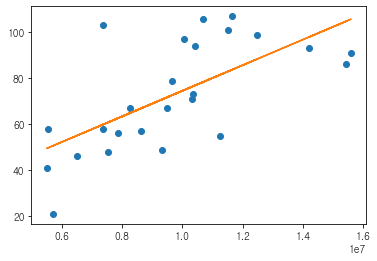

[ 78.27655142  59.90099278  64.91915186  49.75381594  49.4688343
  76.5029851   60.78033653  88.26632797  71.71802979  55.11101844
  66.97783351  76.32592649  83.76979688  74.77675696  62.60122989
  70.80974168  72.69969263  59.8061883   83.00455942  76.89629642
 104.86996916  97.9123206  105.71334971  81.45676024  50.68153398]


In [32]:
plt.plot(df['승하차총승객수'], df['노선수'], 'o')
plt.plot(df['승하차총승객수'], score_predict)
plt.show()

print(score_predict)

## 성능 평가

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
print("Mean_Squared_Error : ", mean_squared_error(score_predict, df['노선수']))

Mean_Squared_Error :  307.3561996936817


In [35]:
print('score: ', line_fitter.score(df['승하차총승객수'].values.reshape(-1,1), df['노선수']))

score:  0.4351664682661629


## MSE 약397.3
## 정확도 약43.5% 

# Hold-Out 을 통한 성능평가

In [36]:
from sklearn.model_selection import train_test_split

In [44]:
X = df['승하차총승객수'].values.reshape(-1,1)
y = df['노선수']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# 승하차 총 승객수에 따른 노선수
# 7대3 으로 train, test 데이터 분류

7대 3으로 나누어 진행했습니다.

In [55]:
print('score: ', line_fitter.score(X_train, y_train))

score:  0.4373718556547451


train 데이터

In [56]:
print('score: ', line_fitter.score(X_test, y_test))

score:  0.4220260697745237


test 데이터

### HeatMap으로 시각화 후 나름의 분석을 해보세요.



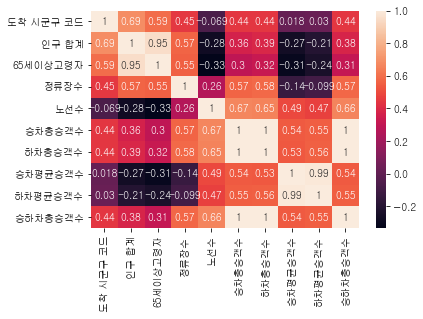

In [43]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
#df.drop(labels=['승차총승객수','하차총승객수','승차평균승객수','하차평균승객수'],axis=1,inplace=True)

sns.heatmap(df.corr(), annot = True)
plt.show()

## 4.관계 정리

### 1) 강한 관계의 변수

### 2) 약한 관계의 변수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?